In [28]:

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans

%matplotlib inline

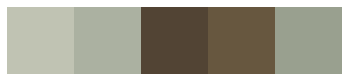

In [93]:
def read_img(i):
    """
    This function reads the corresponding image in the VanGogh folder and return an array
    """

    path = os.path.join(os.getcwd(),'Vincent_van_Gogh','Vincent_van_Gogh_{}.jpg'.format(i+1))
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

    return modified_image

def get_palette(img,n=5):
    """
    This function is used to extract the palette for a given image array,
    5 most dominant colors will be returned as default.
    """

    clf = KMeans(n_clusters = 10)    #create KMeans model with n clusters
    labels = clf.fit_predict(img)   #get clustering results
    counts = Counter(labels)
    sorted_counts = sorted(counts, key=counts.get, reverse=True) #sort colors by prevalence
    center_colors = clf.cluster_centers_    #calculate the mean RGB code for each cluster, the center
    rgb_colors = [center_colors[i] for i in sorted_counts[:n]]    
    palette = np.array([rgb_colors])
    plt.imshow(palette.astype(int));
    plt.axis('off');
    plt.show();

get_palette(read_img(1))


In [123]:
# def get_palette_code(img,n=5):
#     """
#     This function is used to extract the palette for a given image array,
#     RGBcode of the 5 most dominant colors will be returned as default.
#     """

#     clf = KMeans(n_clusters = 10)    #create KMeans model with n clusters
#     labels = clf.fit_predict(img)   #get clustering results
#     counts = Counter(labels)
#     sorted_counts = sorted(counts, key=counts.get, reverse=True) #sort colors by prevalence
#     center_colors = clf.cluster_centers_    #calculate the mean RGB code for each cluster, the center
#     rgb_colors = [center_colors[i].astype(int).tolist() for i in sorted_counts[:n]]    
#     return [tuple(l) for l in rgb_colors]


# VanGogh_palette = []
# for i in range(877):
#     VanGogh_palette.append(get_palette_code(read_img(i)))

    


In [130]:
with open("VanGogh_palette.txt", "w") as f:
    for item in VanGogh_palette:
        f.write("%s\n" % item)

### Reference:
[1](https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71) This notebook is developed based on the method created by Karan Bhanot

[2](https://medium.com/pbsh/vangogh-ai-powered-color-palette-generator-57f4118fa62f) This notebook is inspired by Poobesh Gowtham
